In [9]:
import darwin
from importlib import reload
import penmon as pm
import numpy as np
import pyet
import matplotlib.pyplot as plt

In [3]:
reload(darwin)
path = "/home/ben/data/darwin_measured/11_AWS-PCerroCrocker_data.csv"
df = darwin.load_measurements(path)
daily_means = df.resample("D").mean()
mask = np.isnan(daily_means.SLR) | np.equal(daily_means.SLR, 0)
daily_means= daily_means[~mask]
daily_maxs = df.resample("D").max()
daily_maxs= daily_maxs[~mask]
daily_mins = df.resample("D").min()
daily_mins= daily_mins[~mask]

In [4]:
daily_maxs.tail()

,T,RH,SLR,WS,WD,PCP_tot_bucket,PCP_diff_radar,PCP_acoustic,FOG,ST,Vwc
datetime,,,,,,,,,,,
2023-02-09,24.60,100.0,1241.0,5.724,112.7,0.0,0.00,0.000000,57.0,26.08,0.339
2023-02-10,25.23,100.0,1087.0,4.920,171.7,0.0,0.00,0.000000,70.9,26.30,0.330
2023-02-11,24.64,100.0,1003.0,4.373,139.4,0.4,0.44,0.172778,56.4,24.72,0.323
2023-02-12,23.43,100.0,705.6,3.840,360.0,1.4,2.85,2.094444,64.5,23.56,0.353
2023-02-13,23.01,100.0,725.9,4.746,195.9,1.2,0.44,0.240167,36.0,22.50,0.392


In [16]:
station = pm.Station(latitude=-0.642398, altitude=849)
humid_climate = pm.Climate().humid().coastal().strong_winds()
station.climate = humid_climate
station.anemometer_height = 2

et = []
### getting a day instance for August 16th
for i in daily_means.index:
    et.append(station.day_entry(
            str(i.date()),
            temp_min = daily_mins["T"][i], 
            temp_max = daily_maxs["T"][i],
            temp_mean = daily_means["T"][i],
            wind_speed = daily_means.WS[i],
            humidity_min = daily_mins.RH[i],
            humidity_max = daily_maxs.RH[i],
            humidity_mean = daily_means.RH[i],
            radiation_s = daily_means.SLR[i]/11.6,
        ).eto())
daily_means["et"] = et
print("ETo daily mean is", daily_means['et'].mean() )

ETo daily mean is 1.7417


In [23]:
pet_df = pyet.calculate_all(
    daily_means["T"],
    daily_means.WS,
    daily_means.SLR/11.6,
    elevation=649,
    lat=-0.642398,
    tmax=daily_maxs["T"],
    tmin=daily_mins["T"],
    rh=daily_means.RH,
    rhmax=daily_maxs.RH,
    rhmin=daily_mins.RH,
)

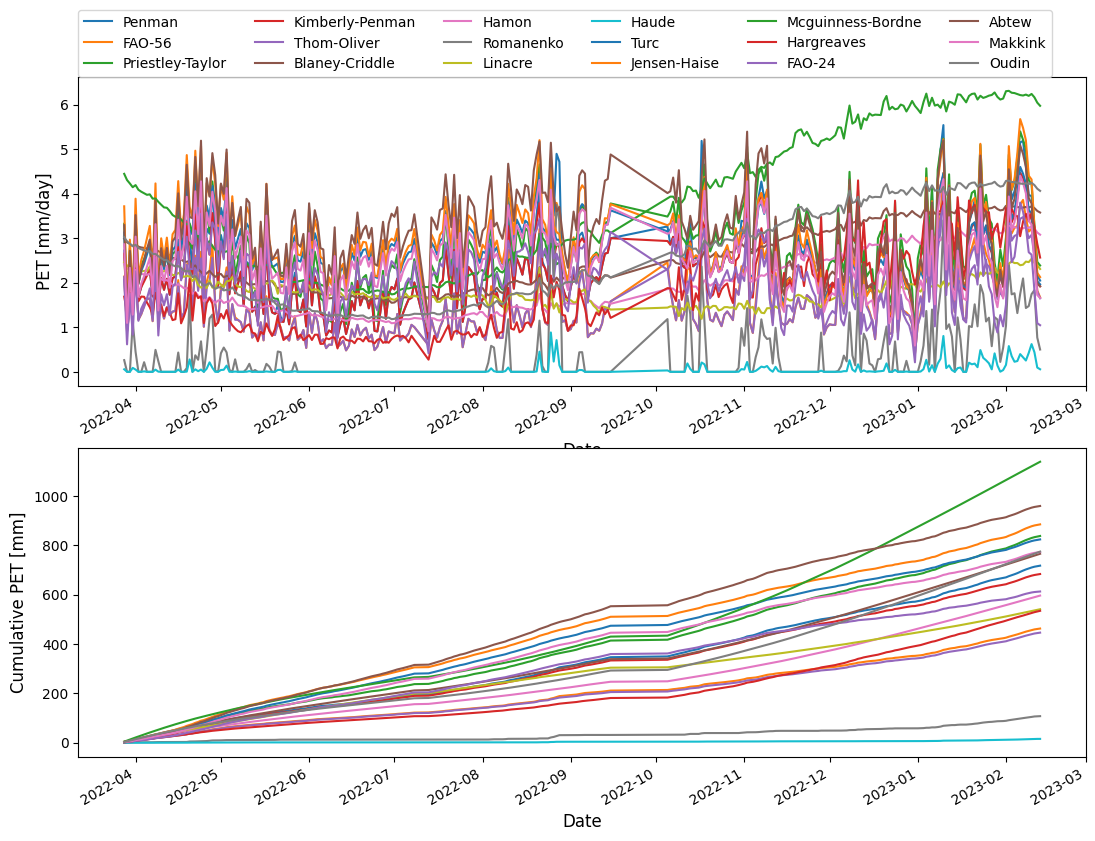

In [33]:
fig, axs = plt.subplots(figsize=(13,10), nrows=2)
pet_df.plot(ax=axs[0])
pet_df.cumsum().plot(ax=axs[1], legend=False)

axs[0].set_ylabel("PET [mm/day]", fontsize=12)
axs[1].set_ylabel("Cumulative PET [mm]", fontsize=12)
axs[0].legend(ncol=6, loc=[0,1.])
for i in (0,1):
    axs[i].set_xlabel("Date", fontsize=12)

In [31]:
import pandas as  pd
pd.get_index((daily_means.SLR/11.6))

AttributeError: module 'pandas' has no attribute 'get_index'